# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/robertonacu/tmdb-kdramas-2022?select=networks.csv

Import the necessary libraries and create your dataframe(s).

In [2]:
#import needed libraires with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Again, I will approach the 5 datasets individually for cleaning as I did for EDA.
    
# read in and name the 5 datasets
series = pd.read_csv("series.csv")
genres = pd.read_csv("genres.csv")
networks = pd.read_csv("networks.csv")
people = pd.read_csv("people.csv")
production_companies = pd.read_csv("production_companies.csv")


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

### Series

In [26]:
series.shape

(1514, 22)

In [28]:
series.isnull().sum()
# keywords is missing a lot but I like it so am going to keep it...i think
# urls, director ids and production company ids can go because they are missing so much
# the episode air date columns are missing alot because its not applicable (these shows most likely have already ended. remember, a lot of shows end after one season. So if it aired before 2022 its most likely over. Also this data was complied in __? so it may be out of date depending on when you're reading this)

tmdb_id                        0
name                           0
original_name                  0
keywords                     542
airing_date                   64
poster_img_url                94
background_img_url           332
directors_ids               1350
cast_ids                      40
genres_ids                     0
number_of_seasons              4
number_of_episodes            13
episode_run_time             220
synopsis                      78
popularity                     0
average_rating               387
rating_count                 387
next_episode_to_air         1478
next_episode_air_date       1478
origin_country                46
networks_ids                 205
production_companies_ids     608
dtype: int64

In [4]:
# using a missing data percentage list because with such large total numbers it can be hard to eyeball how significant a missin gquantity is overall 
# i didn't notice before that 3% of cast ids are missing. its low if it was something else, but if I'm 
    # basing my business issue on cast then do I need data/columns where there is no cast id?

for col in series.columns:
    pct_missing = np.mean(series[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%
original_name - 0%
keywords - 36%
airing_date - 4%
poster_img_url - 6%
background_img_url - 22%
directors_ids - 89%
cast_ids - 3%
genres_ids - 0%
number_of_seasons - 0%
number_of_episodes - 1%
episode_run_time - 15%
synopsis - 5%
popularity - 0%
average_rating - 26%
rating_count - 26%
next_episode_to_air - 98%
next_episode_air_date - 98%
origin_country - 3%
networks_ids - 14%
production_companies_ids - 40%


In [ ]:
# I want to get rid of 3% records that don't have values for cast_ids but i don't recall how 
# I am tempted to get rid of columns missing 20% or more but my curiosity of links
    #between keywords, average_rating, and next_episode_air_date and how they might 
    #correlate with popularity make me want to keep them

### Genres --

In [5]:
#no missing data here!
genres.isnull().sum()

tmdb_id    0
name       0
dtype: int64

### Networks ---

In [8]:
#not a lot of values in this dataset so I'm looking at percentages to see how big
    #of a deal it is to isnull sums like 29 and 14 from a column
    #since this is a small set, missing an entry for 29 records is a big impact
    #I'll only keep the first two columns from this set
    
#I don't need to take any action at this point but will drop several columns in the Irrelevanat data section
networks.isnull().sum()

tmdb_id            0
name               0
headquarters      29
homepage          14
logo_path         15
origin_country    14
dtype: int64

In [9]:
for col in networks.columns:
    pct_missing = np.mean(networks[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%
headquarters - 38%
homepage - 18%
logo_path - 19%
origin_country - 18%


In [16]:
networks.columns

Index(['tmdb_id', 'name', 'headquarters', 'homepage', 'logo_path',
       'origin_country'],
      dtype='object')

### People ----

In [ ]:
people

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

### Series

In [4]:
series.describe()

#1585 for max episode run time seems extreme and like a mistake unless its some show that followed people over the course of a day AND broadcast or uploaded it? I'll want to find this instance in cleaning checkpoint
# number of seasons looks accurate just from my knoweledge of watching shows, I noticed that a second season is rare, nearly no-existant
#1 min run time and 1 episode both sound suspicious. i'll have to find which show and verify its not a mistake. from my experience watching, I can say that most having an avg run time of over an hour sounds about right!

,tmdb_id,number_of_seasons,number_of_episodes,episode_run_time,popularity,average_rating,rating_count,next_episode_to_air
count,1514.000000,1510.000000,1501.000000,1294.000000,1514.000000,1127.000000,1127.000000,36.000000
mean,85302.124835,1.076159,26.246502,53.762751,10.598843,7.509714,51.498669,7.416667
std,49546.561615,0.527722,34.041101,54.882509,26.119971,1.308382,388.931765,12.248324
min,333.000000,1.000000,1.000000,1.000000,0.600000,0.500000,1.000000,1.000000
25%,50597.000000,1.000000,11.000000,35.000000,2.027000,7.000000,2.000000,1.000000
50%,75525.000000,1.000000,16.000000,60.000000,4.942500,7.800000,5.000000,2.000000
75%,113570.500000,1.000000,24.000000,65.000000,10.140250,8.300000,15.000000,7.500000
max,214406.000000,12.000000,476.000000,1585.000000,414.151000,10.000000,11835.000000,63.000000


array([[<AxesSubplot:title={'center':'tmdb_id'}>,
        <AxesSubplot:title={'center':'number_of_seasons'}>,
        <AxesSubplot:title={'center':'number_of_episodes'}>],
       [<AxesSubplot:title={'center':'episode_run_time'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'average_rating'}>],
       [<AxesSubplot:title={'center':'rating_count'}>,
        <AxesSubplot:title={'center':'next_episode_to_air'}>,
        <AxesSubplot:>]], dtype=object)

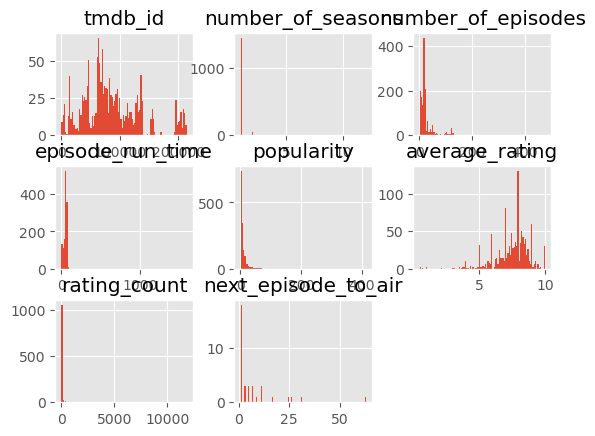

In [10]:
series.hist(bins=100)


<AxesSubplot:>

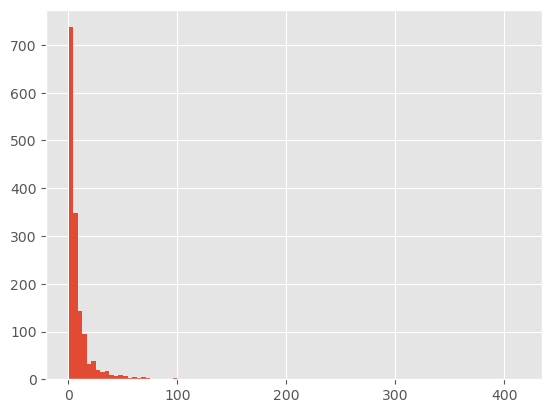

In [12]:
series['popularity'].hist(bins=100)

<AxesSubplot:>

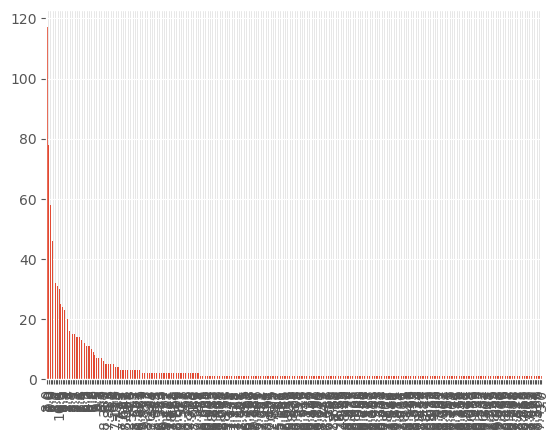

In [14]:
series['average_rating'].value_counts().plot.bar()


<AxesSubplot:>

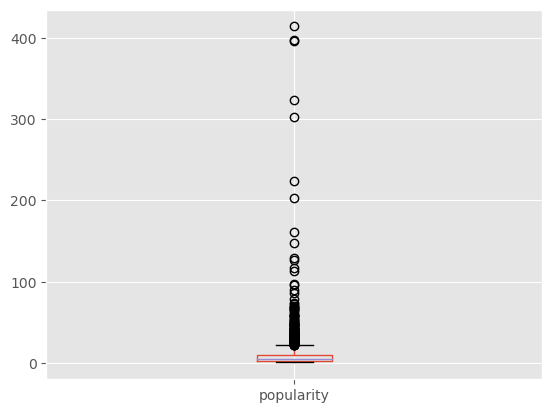

In [27]:
series.boxplot(column=['popularity'])


### Genres --

### Networks ---

array([[<AxesSubplot:title={'center':'tmdb_id'}>]], dtype=object)

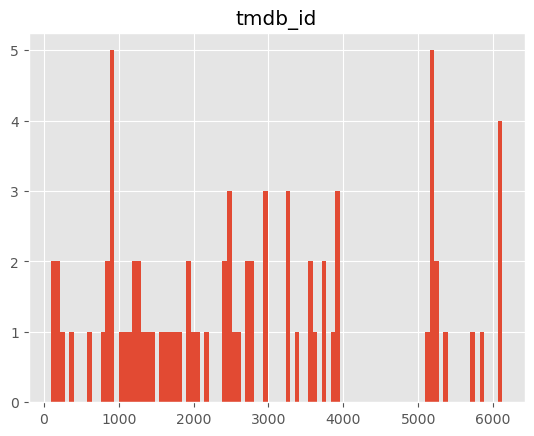

In [24]:
#nothing irregular found
networks.hist(bins=100)


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

### Series

In [8]:
series.columns

Index(['tmdb_id', 'name', 'original_name', 'keywords', 'airing_date',
       'poster_img_url', 'background_img_url', 'directors_ids', 'cast_ids',
       'genres_ids', 'number_of_seasons', 'number_of_episodes',
       'episode_run_time', 'synopsis', 'popularity', 'average_rating',
       'rating_count', 'next_episode_to_air', 'next_episode_air_date',
       'origin_country', 'networks_ids', 'production_companies_ids'],
      dtype='object')

in general, i think all url columns can go. I don't need them. Unless I can use them some cool way to grab a poster or actor headshot in tableua somehow. Definitely don't need websites

These columns can go:

'original_name', 'poster_img_url', 'background_img_url', 

maybe these: 
'next_episode_to_air', 'next_episode_air_date',  'production_companies_ids'




In [36]:
series_df = series[['tmdb_id', 'name', 'keywords', 'airing_date', 'cast_ids',
       'genres_ids', 'number_of_seasons', 'number_of_episodes',
       'episode_run_time', 'synopsis', 'popularity', 'average_rating',
       'rating_count', 'networks_ids']]

In [37]:
series_df.columns

Index(['tmdb_id', 'name', 'keywords', 'airing_date', 'cast_ids', 'genres_ids',
       'number_of_seasons', 'number_of_episodes', 'episode_run_time',
       'synopsis', 'popularity', 'average_rating', 'rating_count',
       'networks_ids'],
      dtype='object')

In [38]:
series_df.head(20)

,tmdb_id,name,keywords,airing_date,cast_ids,genres_ids,number_of_seasons,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,networks_ids
0,208249,Game of Witches,NaN,2022-10-11,"582555, 2117665, 1066220","18, 80, 9648",1.0,29.0,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,97
1,99966,All of Us Are Dead,"high school, bullying, based on comic, horror,...",2022-01-28,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",2.0,12.0,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,213
2,112888,True Beauty,"high school, beauty, makeover, hidden identity...",2020-12-09,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",1.0,16.0,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN
3,93405,Squid Game,"secret organization, challenge, survival, fict...",2021-09-17,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",2.0,9.0,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,213
4,211174,Vengeance of the Bride,"revenge, daughter–in–law, enemy, woman",2022-10-10,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",1.0,30.0,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,342
5,136699,Glitch,"friendship, investigation, ufo, miniseries, su...",2022-10-07,"2067860, 1523043, 1418580, 2239782, 150697, 17...","18, 35, 9648, 10765",1.0,10.0,54.0,A young woman joins forces with a UFO enthusia...,223.442,7.674,43.0,213
6,112836,Money Heist: Korea - Joint Economic Area,"robbery, bank, remake, money, bank robbery, ho...",2022-06-24,"10112, 28662, 1593672, 1937533, 551682, 125760...","10759, 80, 18, 9648",1.0,12.0,NaN,"Disguised under the shadows of a mask, a crew ...",202.731,7.886,398.0,213
7,67915,Goblin,"romance, super power, past life, immortal",2016-12-02,"150903, 1067849, 1238592, 1254169, 1398345, 12...","18, 10765",1.0,16.0,77.0,In his quest for a bride to break his immortal...,160.914,8.711,2361.0,NaN
8,197067,Extraordinary Attorney Woo,"court case, court, autism, lawyer, courtroom, ...",2022-06-29,"1134684, 1565392, 1648169, 1572347, 2720442, 5...","18, 35",1.0,16.0,70.0,Brilliant attorney Woo Young-woo tackles chall...,147.054,8.310,381.0,"213, 5841"
9,129473,Young Lady and Gentleman,"tutor, family, single father, healing, rich ma...",2021-09-25,"1253552, 2752543, 1568455, 1254981, 1487437, 1...","35, 18, 10751",1.0,52.0,70.0,Lee Young Kook is a widower with three childre...,128.825,8.125,8.0,342


In [39]:
series_df.shape

(1514, 14)

### Genres --

In [23]:
genres.columns

#only 2 columns. keeping both

Index(['tmdb_id', 'name'], dtype='object')

In [26]:
#dataset is complete wiht no missing values

for col in genres.columns:
    pct_missing = np.mean(genres[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


tmdb_id - 0%
name - 0%


### Networks ---

In [22]:
# don't need these: 'headquarters' (also its missing a high percentage or data), 'homepage', 'logo_path', 'origin_country'
# Dropping these features/columns

cols_to_drop = ['headquarters', 'homepage', 'logo_path',
       'origin_country']
networks_cleaned = networks.drop(cols_to_drop, axis=1)
networks_cleaned.head()

,tmdb_id,name
0,3266,GagaOOLala
1,1923,KBS Joy
2,2974,Lifetime
3,1671,LINE TV
4,3869,U-NEXT


### People ----

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

### Series

### Genres --

In [27]:
#a little odd that only 18 are considered drama. I'd think that things like crime, mystery, action and adventure, 
    #and war and politics would all or at least most also fall under drama. does "drama" mean something else culturally 
    #or for whoever decided the genres?
#nothing that needs changing, though. just curioius
    
genres.info

<bound method DataFrame.info of     tmdb_id                name
0        18               Drama
1        80               Crime
2      9648             Mystery
3     10759  Action & Adventure
4     10765    Sci-Fi & Fantasy
5        35              Comedy
6     10751              Family
7     10768      War & Politics
8     10766                Soap
9        36             History
10    10749             Romance
11    10764             Reality
12    10762                Kids
13       16           Animation
14       99         Documentary>

### Networks ---

### People ----

In [ ]:
#Basic Syntax: cleaned-dataframe.to_csv("path-where-you-want-to-save-your-exported-file/name.csv")



## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?